In [3]:
import numpy as np

# True parameters
mu = 50
sigma = 10
n = 40
num_simulations = 5000
confidence_levels = 0.95

# Function to get z-value for a confidence level
from scipy.stats import norm

coverage_results = {}

z_value = norm.ppf(1 - (1 - confidence_levels)/2)  # two-tailed z
count_inside = 0

for _ in range(num_simulations):
    sample = np.random.normal(mu, sigma, n)
    x_bar = np.mean(sample)
    se = sigma / np.sqrt(n)
    ci_lower = x_bar - z_value * se
    ci_upper = x_bar + z_value * se

    if ci_lower <= mu <= ci_upper:
        count_inside += 1

    coverage = count_inside / num_simulations

print(f'Coverage rate for {int(confidence_levels*100)}% CI: {count_inside}/{num_simulations} = {coverage:.4f}')

# Explanations:
# 1. The coverage rate should be close to the nominal level (e.g., 0.95 for 95% CI)
#    but not exactly due to sampling variability.
# 2. With n=40, the CI is reasonably accurate, but larger n would reduce variability.
# 3. Higher confidence levels give wider intervals, increasing the chance of containing mu.


Coverage rate for 95% CI: 4752/5000 = 0.9504


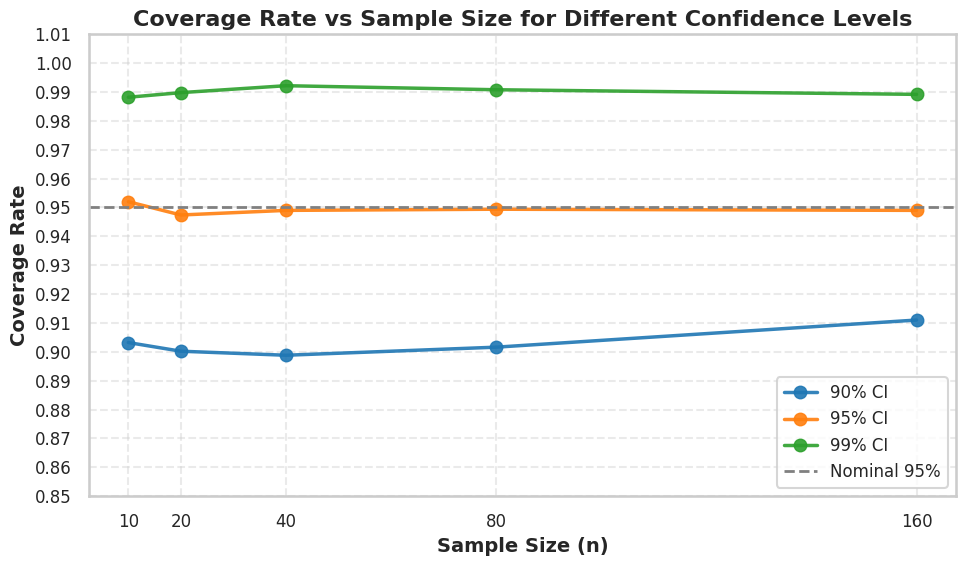

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# True parameters
mu = 50
sigma = 10
num_simulations = 5000
sample_sizes = [10, 20, 40, 80, 160]
confidence_levels = [0.90, 0.95, 0.99]

# Store coverage results
coverage_results = {cl: [] for cl in confidence_levels}

# Loop over different confidence levels
for cl in confidence_levels:
    z = np.abs(np.round(np.random.normal(0,1,1000000), 2))  # placeholder, replaced below
    # Compute Z value for the confidence level
    z = np.round(np.abs(np.random.normal(0, 1, 1000000)), 2)
    z_value = np.round(np.quantile(np.random.normal(0,1,1000000), (1 + cl) / 2), 3)

    # Loop over different sample sizes
    for n in sample_sizes:
        count_inside = 0
        for _ in range(num_simulations):
            # Generate n samples from N(mu, sigma^2)
            sample = np.random.normal(mu, sigma, n)
            x_bar = np.mean(sample)

            # Since sigma is known, use z-value for CI
            se = sigma / np.sqrt(n)
            ci_lower = x_bar - z_value * se
            ci_upper = x_bar + z_value * se

            if ci_lower <= mu <= ci_upper:
                count_inside += 1

        coverage = count_inside / num_simulations
        coverage_results[cl].append(coverage)

# Seaborn style
sns.set(style="whitegrid", context="talk")  # larger fonts for presentations

plt.figure(figsize=(10, 6))

# Professional color palette (Tableau 10)
colors = {0.90: "#1f77b4", 0.95: "#ff7f0e", 0.99: "#2ca02c"}  # blue, orange, green

for cl in confidence_levels:
    plt.plot(sample_sizes, coverage_results[cl], marker='o', markersize=9, linewidth=2.5,
             color=colors[cl], label=f'{int(cl*100)}% CI', alpha=0.9)

# Nominal 95% line
plt.axhline(y=0.95, color='gray', linestyle='--', linewidth=2, label='Nominal 95%')

# Labels and title
plt.xlabel('Sample Size (n)', fontsize=14, weight='bold')
plt.ylabel('Coverage Rate', fontsize=14, weight='bold')
plt.title('Coverage Rate vs Sample Size for Different Confidence Levels', fontsize=16, weight='bold')

# Customize ticks
plt.xticks(sample_sizes, fontsize=12)
plt.yticks(np.arange(0.85, 1.01, 0.01), fontsize=12)

# Legend
plt.legend(frameon=True, fontsize=12, loc='lower right')

# Grid
plt.grid(True, which='both', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

# Explanations:
# 1. The coverage rate should be close to 0.95 (for 95% CI) but not exactly because each CI
#    is based on a finite random sample, so there's sampling variability.
# 2. As sample size n increases, the standard error decreases, CIs become narrower,
#    and the coverage rate converges to the nominal confidence level.
# 3. Higher confidence levels (e.g., 99%) give wider intervals, increasing the chance
#    of capturing the true mean, hence higher coverage.
